In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("records.csv")
df.head()

,Start Time,Request Type,Latency,Response Code
0,1675311274765,POST,855,201
1,1675311274770,POST,851,201
2,1675311274754,POST,867,201
3,1675311274754,POST,867,201
4,1675311274754,POST,867,201


In [3]:
df_sorted = df.sort_values(by="Start Time")
df_sorted["Start Time"] -= df_sorted["Start Time"].min()
print(df_sorted["Start Time"].max())
df_sorted["Start Time"] //= 1000
df_sorted.head()

60944


,Start Time,Request Type,Latency,Response Code
517,0,POST,1073,201
546,0,POST,1084,201
545,0,POST,1084,201
544,0,POST,1083,201
610,0,POST,1107,201


In [4]:
bins = np.arange(df_sorted["Start Time"].min(), df_sorted["Start Time"].max() + 2)

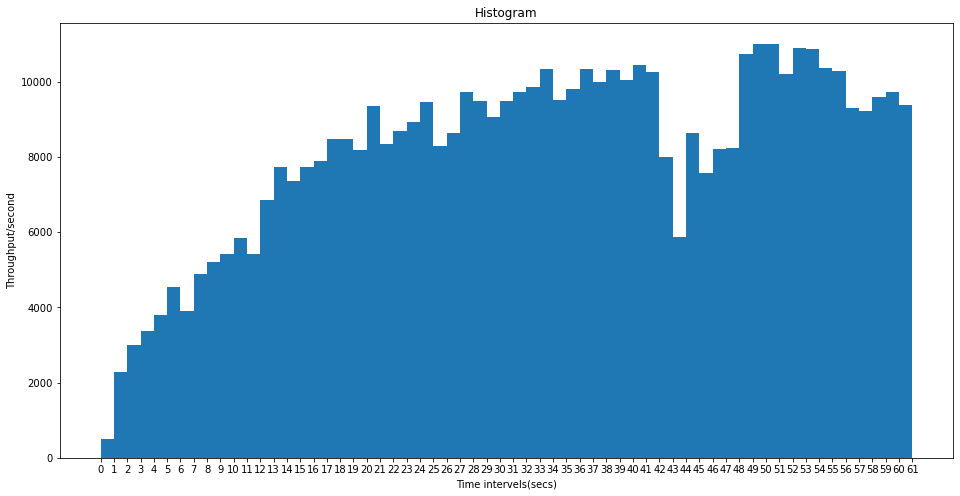

In [9]:
plt.subplots(figsize=(16, 8))
plt.hist(df_sorted["Start Time"], bins)
plt.xticks(bins)
plt.xlabel("Time intervels(secs)")
plt.ylabel("Throughput/second")
plt.title("Histogram")
plt.show()

In [6]:
df_sorted["Bin"] = pd.cut(df_sorted["Start Time"], bins, right=False)

In [7]:
result = df_sorted["Bin"].value_counts().sort_index()

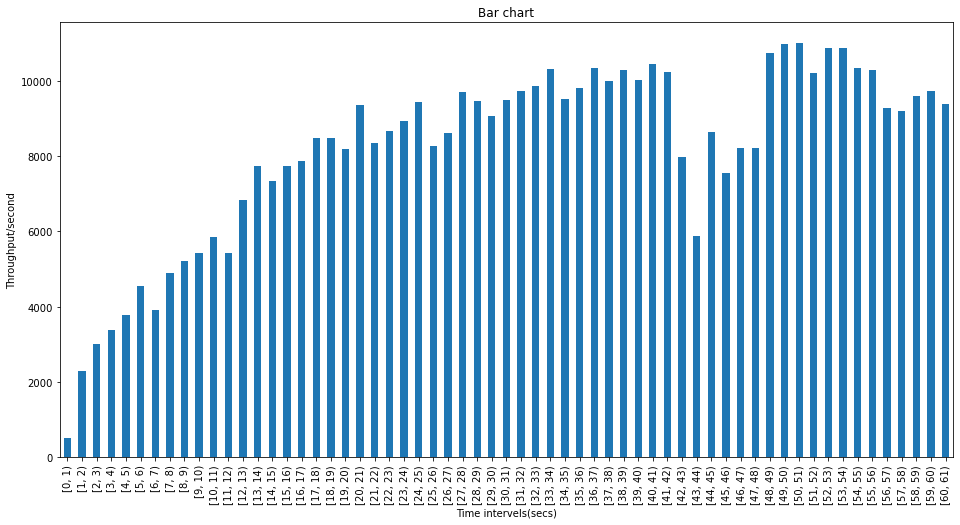

In [10]:
plt.subplots(figsize=(16, 8))
result.plot(kind="bar")
plt.xlabel("Time intervels(secs)")
plt.ylabel("Throughput/second")
plt.title("Bar chart")
plt.show()